# Exercise 1: Setting Up the Environment

In [ ]:
!pip install pgmpy numpy pandas matplotlib

# Exercise 2: Building a Simple DBN


In [ ]:
from pgmpy.models import DynamicBayesianNetwork as DBN
from pgmpy.factors.discrete import TabularCPD

dbn = DBN()

dbn.add_edges_from([
    (('Rain', 0), ('Sprinkler', 0)),
    (('Rain', 0), ('Rain', 1)),
    (('Sprinkler', 0), ('Sprinkler', 1)),
    (('Rain', 1), ('Sprinkler', 1))
])

cpd_rain_0 = TabularCPD(('Rain', 0), 2, [[0.7], [0.3]])
cpd_sprinkler_0 = TabularCPD(('Sprinkler', 0),
                              2,
                              [[0.4, 0.8], [0.6, 0.2]],
                              evidence=[('Rain', 0)],
                              evidence_card=[2])
cpd_rain_1 = TabularCPD(('Rain', 1),
                        2,
                        [[0.6, 0.2], [0.4, 0.8]],
                        evidence=[('Rain', 0)],
                        evidence_card=[2])
cpd_sprinkler_1 = TabularCPD(('Sprinkler', 1),
                             2,
                             [[0.2, 0.3, 0.6, 0.7], [0.8, 0.7, 0.4, 0.3]],
                             evidence=[('Rain', 1), ('Sprinkler', 0)],
                             evidence_card=[2,2])

dbn.add_cpds(cpd_rain_0, cpd_sprinkler_0, cpd_rain_1, cpd_sprinkler_1)

assert dbn.check_model()

print("The DBN model has been successfully created and is valid.")

The DBN model has been successfully created and is valid.


# Exercise 3: Performing Inference

In [ ]:
from pgmpy.inference import DBNInference
dbn_inf = DBNInference(dbn)

evidence = {
    ('Rain', 0): 1,
    ('Sprinkler', 0): 1
}

query_result = dbn_inf.forward_inference([('Sprinkler', 1)], evidence)

print("Probabilities of Sprinkler at time slice 1 given evidence:")
print(f"P(Sprinkler(1) | Rain(0)=True, Sprinkler(0)=On): {query_result[('Sprinkler', 1)].values}")

Probabilities of Sprinkler at time slice 1 given evidence:
P(Sprinkler(1) | Rain(0)=True, Sprinkler(0)=On): [0.62 0.38]


# Exercise 4: Visualizing the DBN


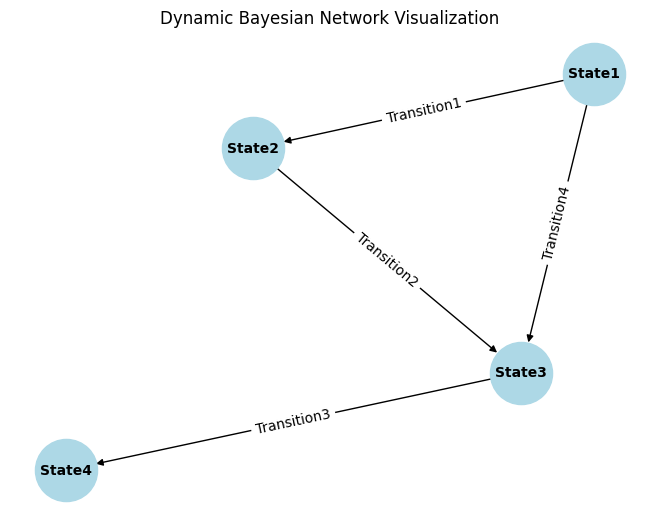

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

dbn = nx.DiGraph()
states = ['State1', 'State2', 'State3', 'State4']
dbn.add_nodes_from(states)
transitions = [('State1', 'State2'),
               ('State2', 'State3'),
               ('State3', 'State4'),
               ('State1', 'State3')]
dbn.add_edges_from(transitions)

pos = nx.spring_layout(dbn)

try:
    nx.draw(dbn, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

    edge_labels = {('State1', 'State2'): 'Transition1',
                   ('State2', 'State3'): 'Transition2',
                   ('State3', 'State4'): 'Transition3',
                   ('State1', 'State3'): 'Transition4'}
    nx.draw_networkx_edge_labels(dbn, pos, edge_labels=edge_labels)

    plt.title("Dynamic Bayesian Network Visualization")
    plt.axis('off')
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")

# Exercise 5: Extending the DBN

**Adding New Nodes and Dependencies**

**Define the New Variable:**

*   Introduce a new node, WetGrass, which indicates whether the grass is wet or not. This variable can be influenced by other nodes in the network, such as Rain and Sprinkler.

**Establish Dependencies:**



* The dependencies can be defined as follows:
  *   WetGrass depends on both Rain and Sprinkler.
*   The relationship can be represented as:
  *   If it rains or the sprinkler is on, then WetGrass is likely to be true.

2. Defining the Corresponding Conditional Probability Tables (CPTs)
For each variable in the DBN, you need to define its Conditional Probability Table (CPT). Here’s an example for the new variable WetGrass:
CPT for WetGrass:

---


Rain	Sprinkler	WetGrass (True)	WetGrass (False)

---


True	  True	  0.99	  0.01

---


True	False	0.90	0.10

---


False	True	0.95	0.05

---


False	False	0.01	0.99



---

This table indicates that WetGrass is highly likely to be true if either it rains or the sprinkler is on.

3. Performing Inference on the Extended DBN
After updating the DBN with new nodes and CPTs, you can perform inference to analyze how these changes affect predictions.

Inference Methods:

*   Use filtering, smoothing, or prediction techniques to evaluate the state of WetGrass based on observations of Rain and Sprinkler.

Example Scenario:


*   Suppose you observe that it is raining (Rain = True) and the sprinkler is off (Sprinkler = False). You would use the CPT for WetGrass to infer its state:
  *   Given Rain = True and Sprinkler = False, use the CPT to find that WetGrass = True with a probability of 0.90.


Analyzing Results
After performing inference, analyze how the inclusion of WetGrass impacts your understanding of the system:



*   Evaluate how often WetGrass is predicted to be true under various conditions.
*   Assess how this affects other variables in your DBN.







